# Praca domowa 2
Weronika Orzechowska (327461)

#### Pakiety

In [73]:
random_state = 327461

In [74]:
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import sklearn.metrics as sm

import matplotlib.pyplot as plt
from ISLP.svm import plot as plot_svm

### Zbiór danych i ich przygotowanie

In [75]:
# pobranie danych
df = fetch_openml(data_id=31, parser='auto')
# dodaje parser = 'auto' ze wzlgedu na pojawiajacy sie FutureWarning
y = df.target
X = df.data

In [76]:
# sprawdzenie występowania brakow danych oraz typow zmiennych
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [77]:
# sprawdzenie występowania brakow danych oraz typow zmiennych
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
1000 non-null   category
dtypes: category(1)
memory usage: 1.2 KB


<Axes: >

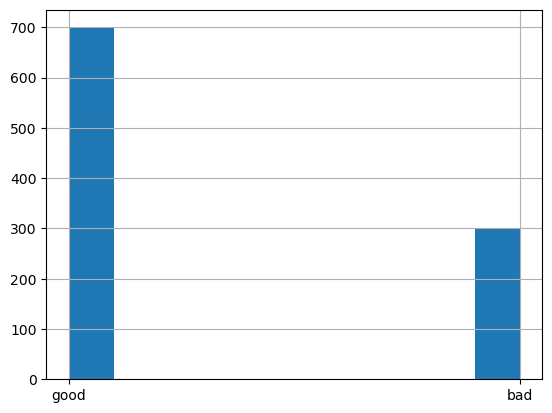

In [78]:
# analiza rozkladu zmiennej celu
y.hist()

In [79]:
# transformacja zmiennych kategorycznych 
X = pd.get_dummies(X)
y = pd.get_dummies(y)
y = y['good']

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

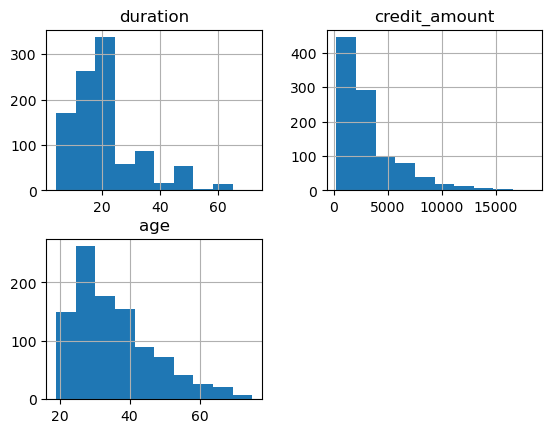

In [80]:
# analiza rozkladow zmiennych numerycznych
numericColumnsNames = X.select_dtypes(include=['int64']).columns
X[['duration', 'credit_amount', 'age']].hist()

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'credit_amount'}>],
       [<Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

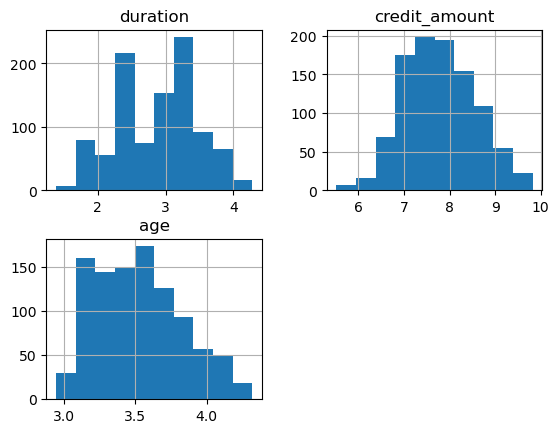

In [81]:
# transformacja logarytmiczna zmiennych 'duration', 'credit_amount' oraz 'age' ze wzgledu na duza skosnosc 
X.duration = np.log(X.duration)
X.credit_amount = np.log(X.credit_amount)
X.age = np.log(X.age)
X[['duration', 'credit_amount', 'age']].hist()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state, stratify = y)

## Część 1

### Model Regresji Logistycznej

In [83]:
# inicjujemy wywołanie algorytmu
lgr = LogisticRegression(penalty = None, max_iter = 1000, random_state = random_state)
# dopasowujemy algorytm do danych
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None, random_state=327461)

**miary jakości modelu na zbiorze treningowym**

In [84]:
y_pred_lg = lgr.predict(X_train)
y_pred_proba_lg = lgr.predict_proba(X_train)[:, 1] 

accuracy = sm.accuracy_score(y_train, y_pred_lg)
recall = sm.recall_score(y_train, y_pred_lg)
precision = sm.precision_score(y_train, y_pred_lg)
auc = sm.roc_auc_score(y_train, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.796
czułość:     0.904
precyzja:    0.822
wartość AUC: 0.833


**miary jakości modelu na zbiorze testowym**

In [85]:
y_pred_lg = lgr.predict(X_test)
y_pred_proba_lg = lgr.predict_proba(X_test)[:, 1] 

accuracy = sm.accuracy_score(y_test, y_pred_lg)
recall = sm.recall_score(y_test, y_pred_lg)
precision = sm.precision_score(y_test, y_pred_lg)
auc = sm.roc_auc_score(y_test, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.727
czułość:     0.862
precyzja:    0.774
wartość AUC: 0.781


**macierz pomyłek**

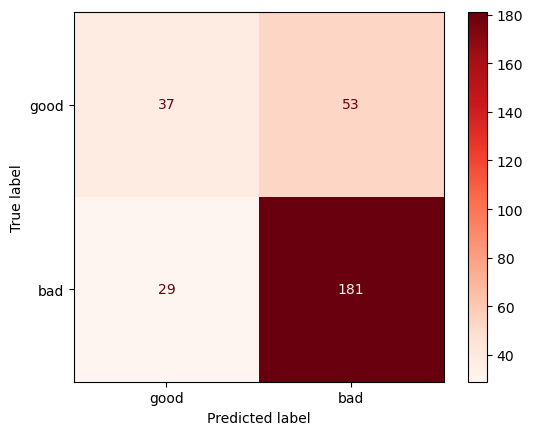

In [86]:
disp = sm.ConfusionMatrixDisplay(confusion_matrix=sm.confusion_matrix(y_test, lgr.predict(X_test)),
                                 display_labels=['good', 'bad'])
disp.plot(cmap=plt.cm.Reds)
plt.show()

**wartości współczynników modelu**

In [87]:
lgr_coef = np.round(lgr.coef_, 3)
lgr_coef

array([[-0.802, -0.287, -0.209, -0.024,  0.123, -0.218, -0.113, -0.147,
        -0.464,  0.877,  1.17 , -0.705,  1.398,  0.705,  0.4  , -0.362,
         1.159, -0.907,  0.755, -0.061, -0.469,  0.078,  1.03 , -0.181,
        -0.902,  0.935,  0.685, -0.241, -0.28 ,  0.726,  0.548,  0.211,
         0.934, -0.032,  0.345, -0.021,  0.213, -0.011,  0.625,  0.609,
         0.072,  1.074,  0.29 ,  0.156, -0.031,  0.85 ,  0.461,  0.392,
         0.984,  0.061,  0.735,  0.65 ,  0.052,  0.593,  0.422,  0.223,
         0.199,  0.574,  0.863,  1.108,  0.329]])

In [88]:
lgr_intercept = np.round(lgr.intercept_, 3)
lgr_intercept

array([1.437])

### Przygotowanie funkcji do modeli z regularyzacją

In [89]:
C = np.array([10, 5, 2, 1.5, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005])

In [90]:
def LogisticRegressionC(penalty, C):

    # dopasowanie solvera do typu reularyzacji
    solver = 'lbfgs'
    if penalty == 'l1':
        solver = 'liblinear'

    # inicjacja wywołania algorytmu
    lg = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=1000, random_state=random_state)

    # 10-krotna stratyfikowana kroswalidacjia
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    auc_train = cross_val_score(lg, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_test = cross_val_score(lg, X_test, y_test, cv=skf, scoring='roc_auc')
    
    # dopasowanie modelu
    lg.fit(X_train, y_train)


    return auc_train, auc_test

### Model Regresji Logistycznej z Regularyzacją L1

In [91]:
# testowanie modelu dla roznych wartosci hiperparametru C

auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
auc_test_sd = []
for c in C:
    auc_train, auc_test = LogisticRegressionC('l1', c)
    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())
    auc_test_sd.append(auc_test.std())

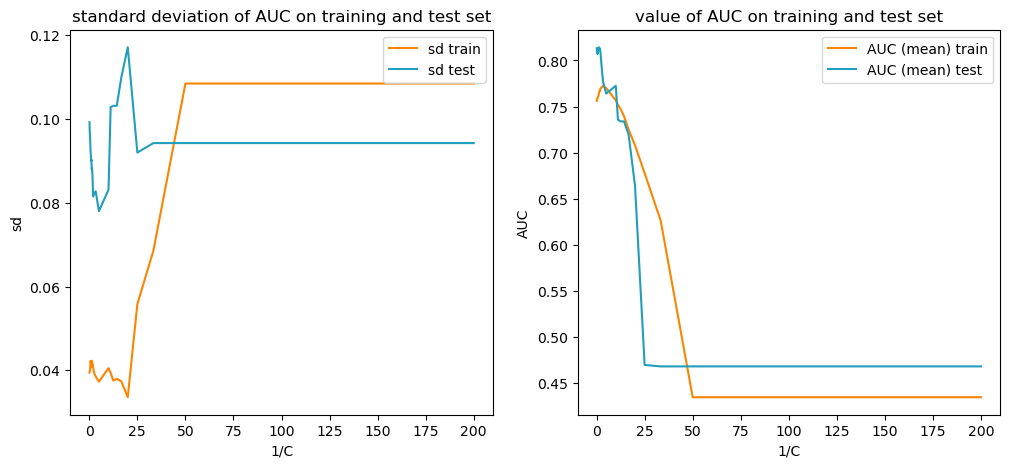

In [92]:
# analiza wartosci sredniej i odchylenia standardowego miary AUC

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(1/C, auc_train_mean, label="AUC (mean) train", color="#fb8500")
axes[1].plot(1/C, auc_test_mean, label="AUC (mean) test", color="#219ebc")
axes[1].set_xlabel("1/C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(1/C, auc_train_sd, label="sd train", color="#fb8500")
axes[0].plot(1/C, auc_test_sd, label="sd test", color="#219ebc")
axes[0].set_xlabel("1/C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()

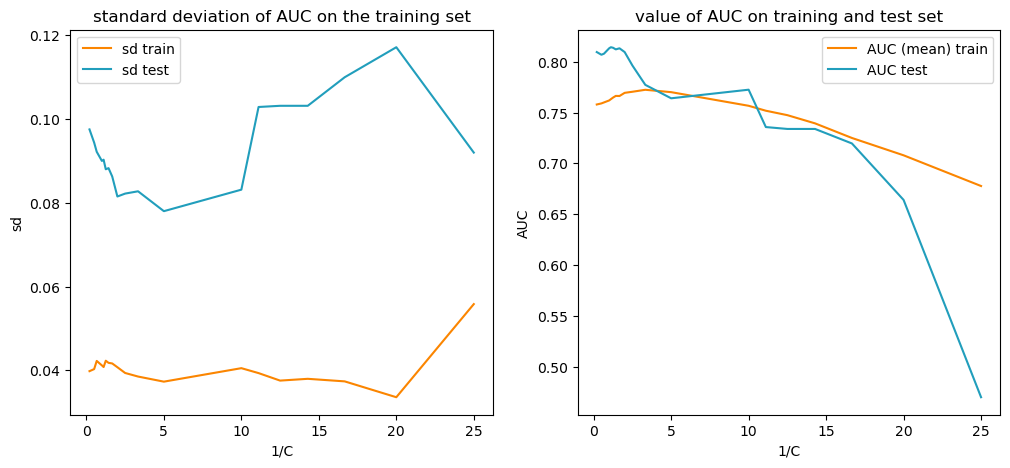

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(1/C[1:20], auc_train_mean[1:20], label="AUC (mean) train", color="#fb8500")
axes[1].plot(1/C[1:20], auc_test_mean[1:20], label="AUC test", color="#219ebc")
axes[1].set_xlabel("1/C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(1/C[1:20], auc_train_sd[1:20], label="sd train", color="#fb8500")
axes[0].plot(1/C[1:20], auc_test_sd[1:20], label="sd test", color="#219ebc")
axes[0].set_xlabel("1/C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()
plt.savefig("regularyzacjaL1w1", dpi=300, bbox_inches="tight")

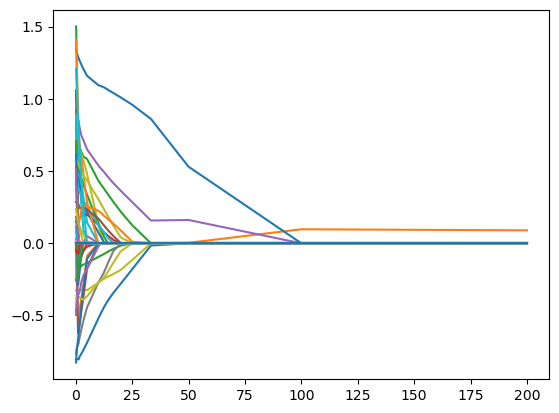

In [94]:
# analiza wartosci wspolczynnikow modelu

coefs = []

for c in C:
    lg = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    lg.fit(X,y)
    coefs.append(lg.coef_[0])

plt.plot(1/C, np.array(coefs));
plt.savefig("regularyzacjaL1w2", dpi=300, bbox_inches="tight")

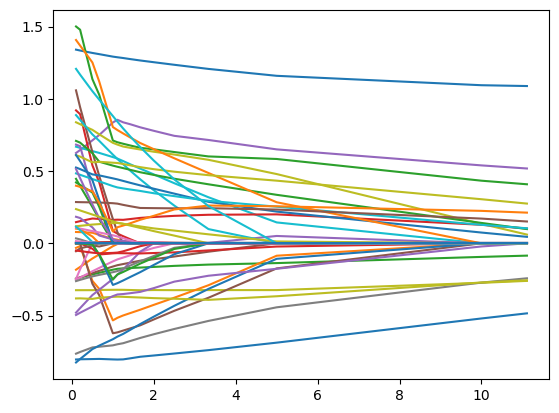

In [95]:
plt.plot(1/C[0:15], np.array(coefs[0:15]));
plt.savefig("regularyzacjaL1w3", dpi=300, bbox_inches="tight")

In [96]:
# szukamy najoptymalniejszego hiperparametru C wykorzystujac stratyfikowana kroswalidacje razem z funkcja GridSearch
# jako wartosci oceniajace bierzymy miare AUC i dokladnosc

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skfold = StratifiedKFold(10,
                  random_state=random_state,
                  shuffle=True)
lg = LogisticRegression(penalty = 'l1', solver = 'liblinear')
grid = GridSearchCV(lg,
                        {'C': [10, 5, 2, 1.5, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005]}, 
                        refit='roc_auc',
                        cv=skfold,
                        scoring=['roc_auc', 'accuracy']
                       )
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.3}

In [97]:
# towrzymy model z najbardziej optymalnymi hiperparametrami
lg1 = LogisticRegression(penalty = 'l1', C = 0.3, solver = 'liblinear')
lg1.fit(X_train, y_train)

LogisticRegression(C=0.3, penalty='l1', solver='liblinear')

**miary jakości modelu na zbiorze treningowym**

In [98]:
y_pred_lg = lg1.predict(X_train)
y_pred_proba_lg = lg1.predict_proba(X_train)[:, 1] 

accuracy = sm.accuracy_score(y_train, y_pred_lg)
recall = sm.recall_score(y_train, y_pred_lg)
precision = sm.precision_score(y_train, y_pred_lg)
auc = sm.roc_auc_score(y_train, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.767
czułość:     0.918
precyzja:    0.785
wartość AUC: 0.813


**miary jakości modelu na zbiorze testowym**

In [99]:
y_pred_lg = lg1.predict(X_test)
y_pred_proba_lg = lg1.predict_proba(X_test)[:, 1] 

accuracy = sm.accuracy_score(y_test, y_pred_lg)
recall = sm.recall_score(y_test, y_pred_lg)
precision = sm.precision_score(y_test, y_pred_lg)
auc = sm.roc_auc_score(y_test, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.757
czułość:     0.9
precyzja:    0.784
wartość AUC: 0.804


**macierz pomyłek**

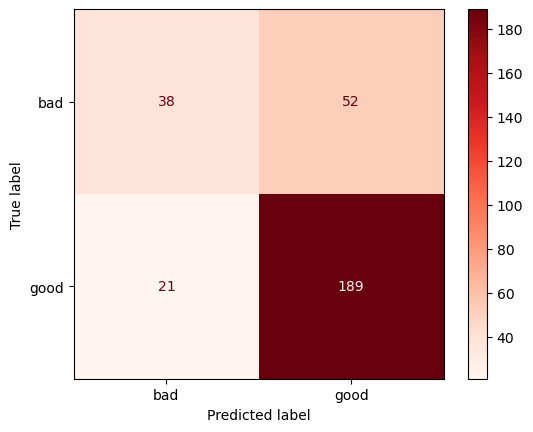

In [100]:
disp = sm.ConfusionMatrixDisplay(confusion_matrix=sm.confusion_matrix(y_test, lg1.predict(X_test)),
                                 display_labels=['bad', 'good'])
disp.plot(cmap=plt.cm.Reds)
plt.savefig("regluryzacjaL1cm.png", format="png", dpi=300)
plt.show()

**wartości współczynników modelu**

In [101]:
lg1_coef = np.round(lg1.coef_, 3)
lg1_coef

array([[-0.604,  0.   , -0.093,  0.   ,  0.521,  0.   ,  0.   ,  0.   ,
        -0.449,  0.337,  1.016, -0.256,  0.709,  0.   ,  0.123, -0.158,
         0.   , -0.535,  0.379,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.433,  0.   ,  0.034,  0.   ,
         0.368, -0.171,  0.   ,  0.   ,  0.   ,  0.   ,  0.101,  0.168,
         0.   ,  0.099,  0.   ,  0.   , -0.002,  0.456,  0.   ,  0.   ,
         0.545,  0.   ,  0.   ,  0.376,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.151,  0.   ,  0.   ]])

In [102]:
lg1_intercept = np.round(lg1.intercept_, 3)
lg1_intercept

array([0.])

### Model Regresji Logistycznej z Regularyzacją L2

In [103]:
# testowanie modelu dla roznych wartosci hiperparametru C

auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
for c in C:
    auc_train, auc_test = LogisticRegressionC('l2', c)
    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())

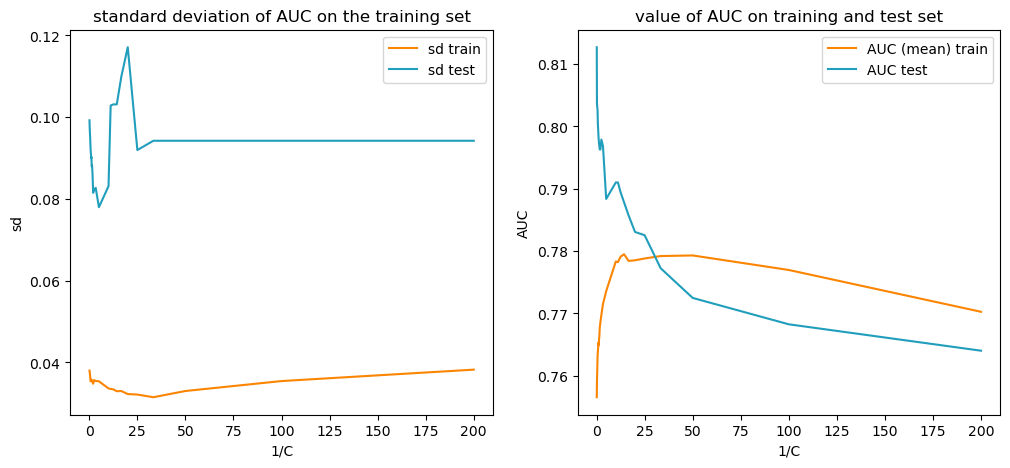

In [104]:
# analiza wartosci sredniej i odchylenia standardowego miary AUC

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(1/C, auc_train_mean, label="AUC (mean) train", color="#fb8500")
axes[1].plot(1/C, auc_test_mean, label="AUC test", color="#219ebc")
axes[1].set_xlabel("1/C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(1/C, auc_train_sd, label="sd train", color="#fb8500")
axes[0].plot(1/C, auc_test_sd, label="sd test", color="#219ebc")
axes[0].set_xlabel("1/C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()

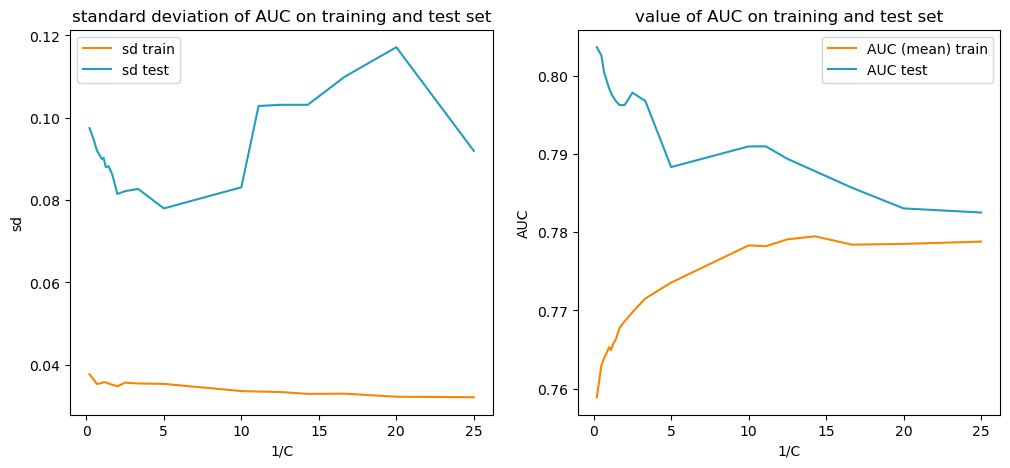

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(1/C[1:20], auc_train_mean[1:20], label="AUC (mean) train", color="#fb8500")
axes[1].plot(1/C[1:20], auc_test_mean[1:20], label="AUC test", color="#219ebc")
axes[1].set_xlabel("1/C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(1/C[1:20], auc_train_sd[1:20], label="sd train", color="#fb8500")
axes[0].plot(1/C[1:20], auc_test_sd[1:20], label="sd test", color="#219ebc")
axes[0].set_xlabel("1/C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()
plt.savefig("regularyzacjaL2w1", dpi=300, bbox_inches="tight")

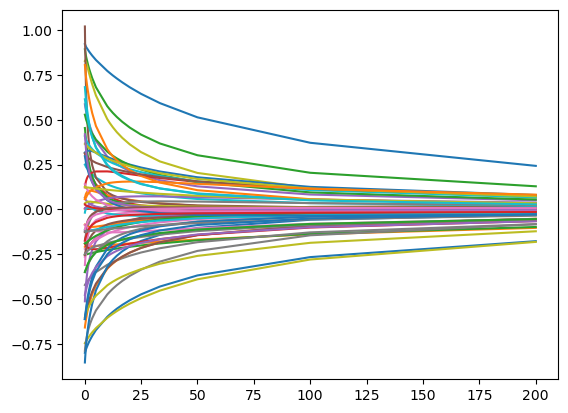

In [106]:
# analiza wartosci wspolczynnikow modelu

coefs = []

for c in C:
    lg = LogisticRegression(penalty = 'l2', C = c, max_iter = 1000)
    lg.fit(X,y)
    coefs.append(lg.coef_[0])

plt.plot(1/C, np.array(coefs));
plt.savefig("regularyzacjaL2w2", dpi=300, bbox_inches="tight")

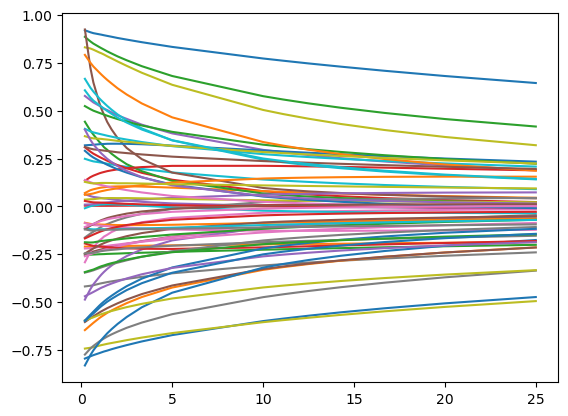

In [107]:
coefs = []

for c in C:
    lg = LogisticRegression(penalty = 'l2', C = c, max_iter = 1000)
    lg.fit(X,y)
    coefs.append(lg.coef_[0])

plt.plot(1/C[1:20], np.array(coefs[1:20]));
plt.savefig("regularyzacjaL2w3", dpi=300, bbox_inches="tight")

In [108]:
# szukamy najoptymalniejszego hiperparametru C wykorzystujac stratyfikowana kroswalidacje razem z funkcja GridSearch
# jako wartosci oceniajace bierzymy miare AUC i dokladnosc

from sklearn.model_selection import StratifiedKFold, GridSearchCV
skfold = StratifiedKFold(10,
                  random_state=random_state,
                  shuffle=True)
lg = LogisticRegression(penalty = 'l2', max_iter = 1000)
grid = GridSearchCV(lg,
                        {'C': [10, 5, 2, 1.5, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005]}, 
                        refit='roc_auc',
                        cv=skfold,
                        scoring=['roc_auc', 'accuracy']
                       )
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.07}

In [109]:
# tworzymy model z najbardziej optymalnymi hiperparametrami

lg2 = LogisticRegression(penalty = 'l2', C = 0.07)
lg2.fit(X_train, y_train)

LogisticRegression(C=0.07)

**miary jakości modelu na zbiorze treningowym**

In [110]:
y_pred_lg = lg2.predict(X_train)
y_pred_proba_lg = lg2.predict_proba(X_train)[:, 1] 

accuracy = sm.accuracy_score(y_train, y_pred_lg)
recall = sm.recall_score(y_train, y_pred_lg)
precision = sm.precision_score(y_train, y_pred_lg)
auc = sm.roc_auc_score(y_train, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.764
czułość:     0.929
precyzja:    0.778
wartość AUC: 0.821


**miary jakości modelu na zbiorze testowym**

In [111]:
y_pred_lg = lg2.predict(X_test)
y_pred_proba_lg = lg2.predict_proba(X_test)[:, 1] 

accuracy = sm.accuracy_score(y_test, y_pred_lg)
recall = sm.recall_score(y_test, y_pred_lg)
precision = sm.precision_score(y_test, y_pred_lg)
auc = sm.roc_auc_score(y_test, y_pred_proba_lg)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.727
czułość:     0.895
precyzja:    0.758
wartość AUC: 0.799


**macierz pomyłek**

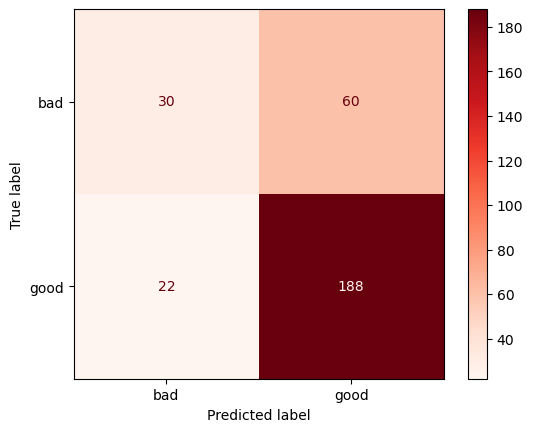

In [112]:
disp = sm.ConfusionMatrixDisplay(confusion_matrix=sm.confusion_matrix(y_test, lg2.predict(X_test)),
                                 display_labels=['bad', 'good'])
disp.plot(cmap=plt.cm.Reds)
plt.savefig("regluryzacjaL2cm.png", format="png", dpi=300)
plt.show()

**wartości współczynników modelu**

In [113]:
lg2_coef = np.round(lg2.coef_, 3)
lg2_coef

array([[-0.476, -0.234, -0.182, -0.021,  0.088, -0.058, -0.031, -0.224,
        -0.569,  0.173,  0.619, -0.322,  0.513,  0.038,  0.019, -0.247,
         0.067, -0.416,  0.322, -0.037, -0.095,  0.076,  0.089,  0.061,
        -0.121,  0.053,  0.129, -0.057, -0.356,  0.095,  0.19 , -0.064,
         0.263, -0.236,  0.09 , -0.054, -0.13 , -0.13 ,  0.099,  0.161,
        -0.072,  0.148, -0.076, -0.119, -0.167,  0.291, -0.005, -0.12 ,
         0.307, -0.187, -0.004,  0.188, -0.184,  0.107, -0.034, -0.021,
        -0.052, -0.133,  0.133,  0.118, -0.118]])

In [114]:
lg2_intercept = np.round(lg2.intercept_, 3)
lg2_intercept

array([4.493])

### Model Elastic Nett

In [176]:
# przygotowanie wartosci hiperparametrow do testowania

alpha = np.array([0.1, 1/5, 1/2, 0.8, 0.9, 1, 2, 3, 4, 5, 8, 9])
l1_ratio = np.array([0.01, 0.02, 0.03, 0.04, 0.05,0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1])

In [174]:
# testowanie modelu dla roznych wartosci hiperparametru alpha

auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
auc_test_sd = []

for a in alpha:
    
    # inicjacja wywolania algorytmu
    en = LogisticRegression(penalty = 'elasticnet', C = 1/a, max_iter = 5000, solver = "saga", l1_ratio = 1, random_state = random_state)

    # 10-krotna stratyfikowana kroswalidacja
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    auc_train = cross_val_score(en, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_test = cross_val_score(en, X_test, y_test, cv=skf, scoring='roc_auc')

    # dopasowanie modelu
    en.fit(X_train, y_train)

    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())
    auc_test_sd.append(auc_test.std())

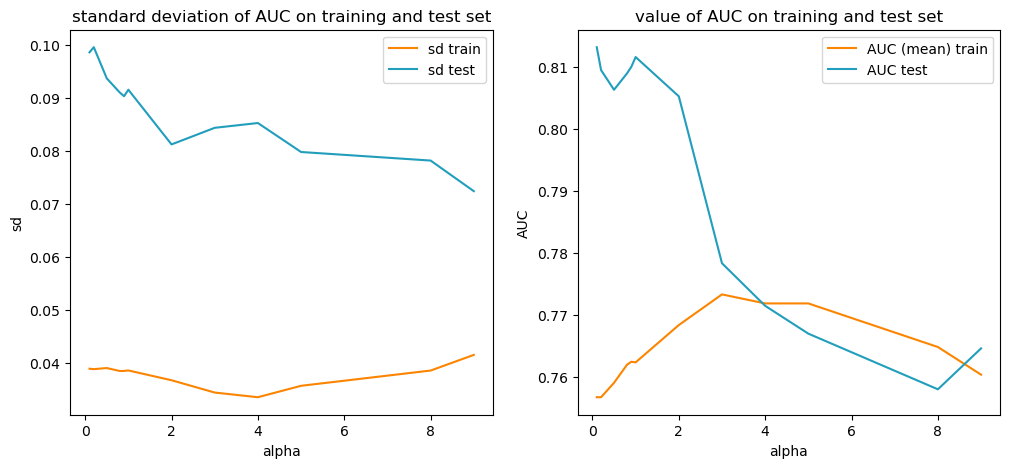

In [177]:
# analiza wartosci sredniej i odchylenia standardowego miary AUC

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(alpha, auc_train_mean, label="AUC (mean) train", color="#fb8500")
axes[1].plot(alpha, auc_test_mean, label="AUC test", color="#219ebc")
axes[1].set_xlabel("alpha")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(alpha, auc_train_sd, label="sd train", color="#fb8500")
axes[0].plot(alpha, auc_test_sd, label="sd test", color="#219ebc")
axes[0].set_xlabel("alpha")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()
plt.savefig("regularyzacjaenw1", dpi=300, bbox_inches="tight")

In [178]:
auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
auc_test_sd = []

for l in l1_ratio:
    en = LogisticRegression(l1_ratio = l, random_state = random_state, penalty = 'elasticnet', solver = 'saga', max_iter = 5000)
        
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
    auc_train = cross_val_score(en, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_test = cross_val_score(en, X_test, y_test, cv=skf, scoring='roc_auc')

    en.fit(X_train, y_train)

    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())
    auc_test_sd.append(auc_test.std())

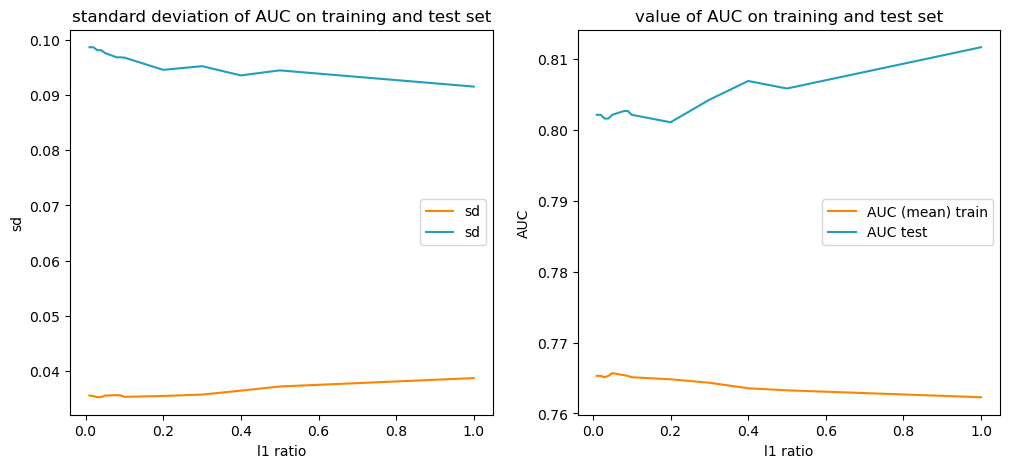

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(l1_ratio, auc_train_mean, label="AUC (mean) train", color="#fb8500")
axes[1].plot(l1_ratio, auc_test_mean, label="AUC test", color="#219ebc")
axes[1].set_xlabel("l1 ratio")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(l1_ratio, auc_train_sd, label="sd", color="#fb8500")
axes[0].plot(l1_ratio, auc_test_sd, label="sd", color="#219ebc")
axes[0].set_xlabel("l1 ratio")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()
plt.savefig("regularyzacjaENw2", dpi=300, bbox_inches="tight")

In [180]:
# znalezienie najbardziej optymalnego parametru dla modelu funkcja Grid Search
# tutaj wybieramy inne miary oceniajace bardziej kompatybilne z modelem
[0.1, 1/5, 1/2, 0.8, 0.9, 1, 2, 3, 4, 5, 8, 9]
skfold = StratifiedKFold(10,
                  random_state=random_state,
                  shuffle=True)
en = LogisticRegression(max_iter = 5000, penalty = 'elasticnet', solver = 'saga', C = 1, l1_ratio = 1, random_state = random_state)
grid = GridSearchCV(en,
                        {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 2, 5, 10], 
                         'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05,0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 1]}, 
                        refit='roc_auc',
                        cv=skfold,
                        scoring=['roc_auc', 'accuracy']
                       )
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.1, 'l1_ratio': 0.3}

In [181]:
en = LogisticRegression(max_iter = 5000, C = 0.1, l1_ratio = 0.3, random_state = random_state, penalty = 'elasticnet', solver = 'saga')
en.fit(X_train, y_train)

LogisticRegression(C=0.1, l1_ratio=0.3, max_iter=5000, penalty='elasticnet',
                   random_state=327461, solver='saga')

**miary jakości modelu na zbiorze treningowym**

In [182]:
y_pred_en = en.predict(X_train)
y_pred_proba_en = en.predict_proba(X_train)[:, 1] 

accuracy = sm.accuracy_score(y_train, y_pred_en)
recall = sm.recall_score(y_train, y_pred_en)
precision = sm.precision_score(y_train, y_pred_en)
auc = sm.roc_auc_score(y_train, y_pred_proba_en)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.764
czułość:     0.931
precyzja:    0.777
wartość AUC: 0.813


**miary jakości modelu na zbiorze testowym**

In [183]:
y_pred_en = en.predict(X_test)
y_pred_proba_en = en.predict_proba(X_test)[:, 1] 

accuracy = sm.accuracy_score(y_test, y_pred_en)
recall = sm.recall_score(y_test, y_pred_en)
precision = sm.precision_score(y_test, y_pred_en)
auc = sm.roc_auc_score(y_test, y_pred_proba_en)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.753
czułość:     0.924
precyzja:    0.77
wartość AUC: 0.798


**macierz pomyłek**

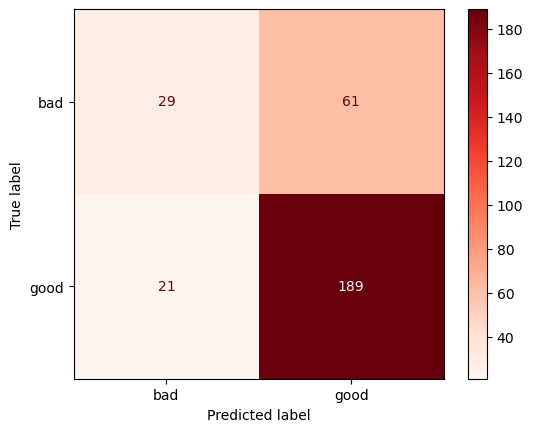

In [184]:
disp = sm.ConfusionMatrixDisplay(confusion_matrix=sm.confusion_matrix(y_test, y_pred_binary),
                                 display_labels=['bad', 'good'])
disp.plot(cmap=plt.cm.Reds)
plt.savefig("regluryzacjaencm.png", format="png", dpi=300)
plt.show()

**wartości współczynników**

In [185]:
en_coef = np.round(en.coef_)
print(en_coef)

[[-1. -0. -0.  0.  0. -0.  0. -0. -1.  0.  1. -0.  1.  0.  0. -0.  0. -0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0.
  -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.  0. -0.  0.
   0.  0.  0. -0.  0.  0.  0.]]


### Wspólny wykres krzywych ROC

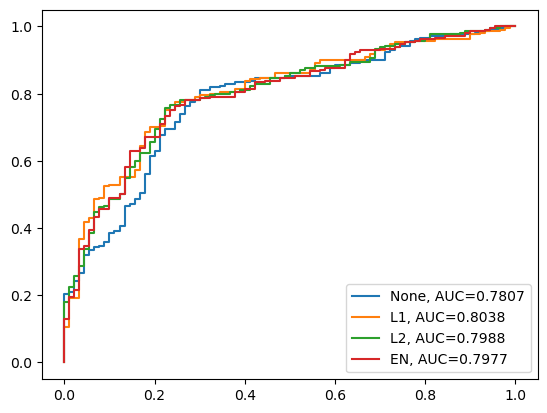

In [186]:
pred_l = lgr.predict_proba(X_test)
pred_l1 = lg1.predict_proba(X_test)
pred_l2 = lg2.predict_proba(X_test)
pred_en = en.predict_proba(X_test)

fpr, tpr, thresholds = sm.roc_curve(y_test, pred_l[:,1])
plt.plot(fpr, tpr, label = "None, AUC="+str(round(sm.roc_auc_score(y_test, pred_l[:,1]), 4)))
fpr, tpr, thresholds = sm.roc_curve(y_test, pred_l1[:,1])
plt.plot(fpr, tpr, label = "L1, AUC="+str(round(sm.roc_auc_score(y_test, pred_l1[:,1]), 4)))
fpr, tpr, thresholds = sm.roc_curve(y_test, pred_l2[:,1])
plt.plot(fpr, tpr, label = "L2, AUC="+str(round(sm.roc_auc_score(y_test, pred_l2[:,1]), 4)))
fpr, tpr, thresholds = sm.roc_curve(y_test, pred_en[:,1])
plt.plot(fpr, tpr, label = "EN, AUC="+str(round(sm.roc_auc_score(y_test, pred_en[:,1]), 4)))
plt.legend()
plt.savefig("krzyweROC", dpi=300, bbox_inches="tight")

## Część 2.

In [57]:
# ograniczenie zmiennych tylko do tych istotnych na podstawie wartosci wspolczynnikow modelu z regularyzacja L1
non_zero_indices = np.nonzero(lg1.coef_)[1]
X = X.iloc[:, non_zero_indices]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state, stratify = y)

In [58]:
C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.5, 2, 5, 10, 15, 20]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

In [59]:
auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
auc_test_sd = []

for c in C:
    svm = SVC(random_state = random_state, C = c, probability = True)
        
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

    auc_train = cross_val_score(svm, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_test = cross_val_score(svm, X_test, y_test, cv=skf, scoring='roc_auc')

    svm.fit(X_train, y_train)
    
    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())
    auc_test_sd.append(auc_test.std())

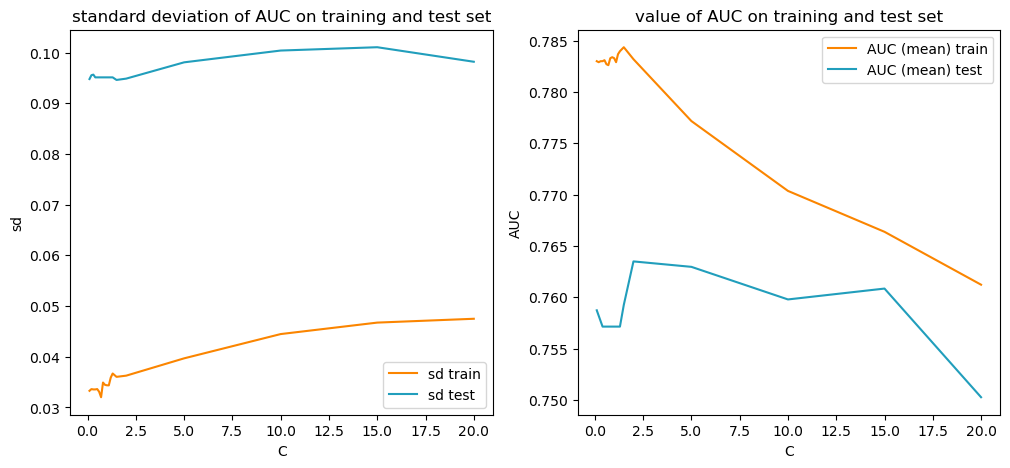

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(C, auc_train_mean, label="AUC (mean) train", color="#fb8500")
axes[1].plot(C, auc_test_mean, label="AUC (mean) test", color="#219ebc")
axes[1].set_xlabel("C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(C, auc_train_sd, label="sd train", color="#fb8500")
axes[0].plot(C, auc_test_sd, label="sd test", color="#219ebc")
axes[0].set_xlabel("C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()

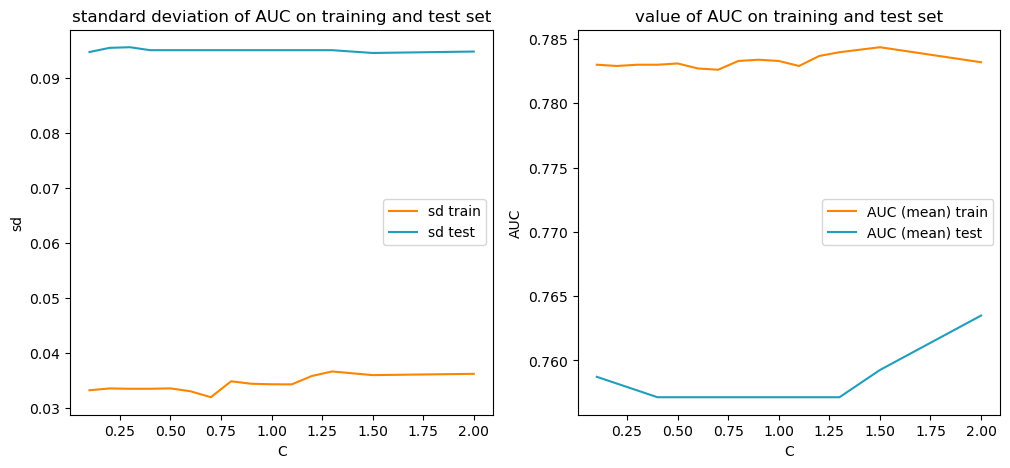

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(C[0:15], auc_train_mean[0:15], label="AUC (mean) train", color="#fb8500")
axes[1].plot(C[0:15], auc_test_mean[0:15], label="AUC (mean) test", color="#219ebc")
axes[1].set_xlabel("C")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(C[0:15], auc_train_sd[0:15], label="sd train", color="#fb8500")
axes[0].plot(C[0:15], auc_test_sd[0:15], label="sd test", color="#219ebc")
axes[0].set_xlabel("C")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()

In [62]:
auc_train_mean = []
auc_train_sd = []
auc_test_mean = []
auc_test_sd = []

for k in kernel:
    svm = SVC(random_state = random_state, kernel = k, probability = True)
        
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

    auc_train = cross_val_score(svm, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_test = cross_val_score(svm, X_test, y_test, cv=skf, scoring='roc_auc')

    svm.fit(X_train, y_train)

    auc_train_mean.append(auc_train.mean())
    auc_train_sd.append(auc_train.std())
    auc_test_mean.append(auc_test.mean())
    auc_test_sd.append(auc_test.std())

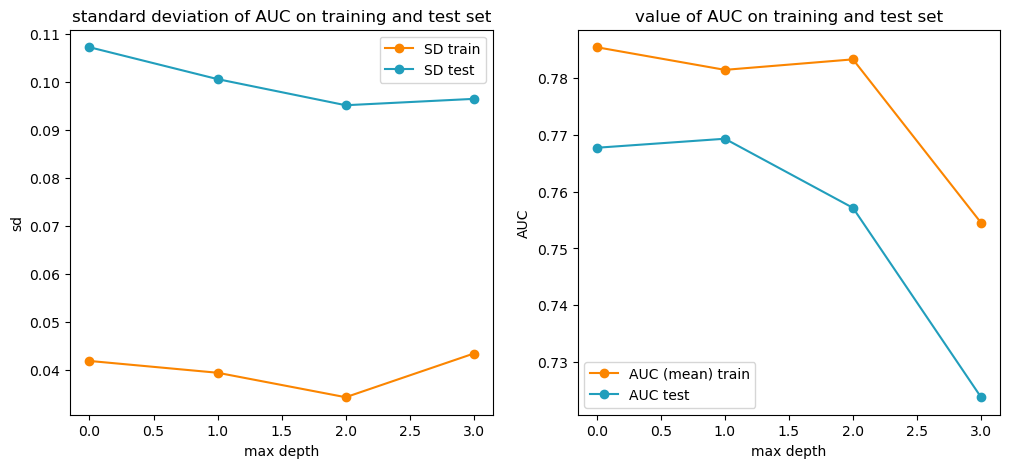

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(range(len(kernel)), auc_train_mean, label="AUC (mean) train", color="#fb8500", marker='o')
axes[1].plot(range(len(kernel)), auc_test_mean, label="AUC test", color="#219ebc", marker='o')
axes[1].set_xlabel("max depth")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(range(len(kernel)), auc_train_sd, label="SD train", color="#fb8500", marker='o')
axes[0].plot(range(len(kernel)), auc_test_sd, label="SD test", color="#219ebc", marker='o')
axes[0].set_xlabel("max depth")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on training and test set")
axes[0].legend()

In [64]:
skfold = StratifiedKFold(10,
                  random_state=random_state,
                  shuffle=True)
svm_linear = SVC(random_state = random_state, probability = True)
grid = GridSearchCV(svm_linear,
                        {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.5, 2, 5, 10, 15, 20], 
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
                        refit='roc_auc',
                        cv=skfold,
                        scoring=['roc_auc', 'accuracy']
                       )
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.4, 'kernel': 'linear'}

In [65]:
svm = SVC(C = 0.4, kernel = 'linear', probability = True, random_state = random_state)
svm.fit(X_train, y_train)

SVC(C=0.4, kernel='linear', probability=True, random_state=327461)

**miary jakości modelu na zbiorze treningowym**

In [66]:
y_pred_svm = svm.predict(X_train)
y_pred_proba_svm = svm.predict_proba(X_train)[:, 1] 

accuracy = sm.accuracy_score(y_train, y_pred_svm)
recall = sm.recall_score(y_train, y_pred_svm)
precision = sm.precision_score(y_train, y_pred_svm)
auc = sm.roc_auc_score(y_train, y_pred_proba_svm)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.779
czułość:     0.914
precyzja:    0.799
wartość AUC: 0.815


**miary jakości modelu na zbiorze testowym**

In [67]:
y_pred_svm = svm.predict(X_test)
y_pred_proba_svm = svm.predict_proba(X_test)[:, 1] 

accuracy = sm.accuracy_score(y_test, y_pred_svm)
recall = sm.recall_score(y_test, y_pred_svm)
precision = sm.precision_score(y_test, y_pred_svm)
auc = sm.roc_auc_score(y_test, y_pred_proba_svm)

print('dokładność: ', round(accuracy, 3))
print('czułość:    ', round(recall, 3))
print('precyzja:   ', round(precision, 3))
print('wartość AUC:', round(auc, 3))

dokładność:  0.733
czułość:     0.881
precyzja:    0.771
wartość AUC: 0.811


**krzywa ROC**

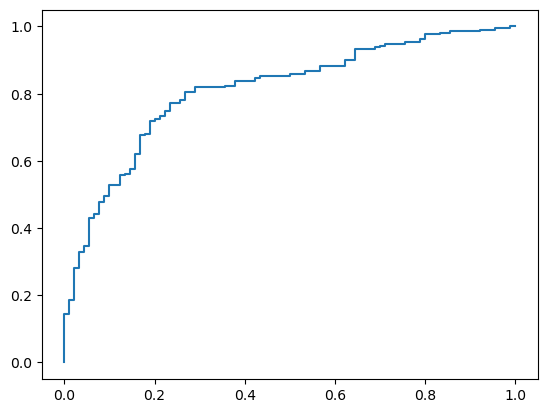

In [68]:
pred_svm = svm.predict_proba(X_test)

fpr, tpr, thresholds = sm.roc_curve(y_test, pred_svm[:,1])
plt.plot(fpr, tpr, label = "SVM, AUC="+str(round(sm.roc_auc_score(y_test, pred_svm[:,1]), 4)))
plt.savefig("krzyweROCsvm", dpi=300, bbox_inches="tight")